# OASIS INFOBYTE  **TASK-01**


# SALES PREDICTION USING PYTHON

###Importing required libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Reading and Preprocessing the given Advertising.csv dataset

In [34]:
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [35]:
#first 5 rows of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
#last 5 rows of the dataset
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


Checking for NULL values in the dataset

In [37]:
#This function checks and gives sum of NULL values in the dataset
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [38]:
#This function gives total no. of duplicate rows in the dataset
df.duplicated().sum()

0

From above we can see that there are no null values and duplicated rows in the dataset

In [39]:
#Getting dimensions of the dataset
df.shape

(200, 5)

Droping unrequired ID column from the dataset

In [40]:
df=df.drop(columns=["Unnamed: 0"])
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Above, we can see Id column is removed

In [41]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [42]:
hm=df.iloc[:,:-1]
hm

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


Plotting histogram for the dataset

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>, <Axes: >]], dtype=object)

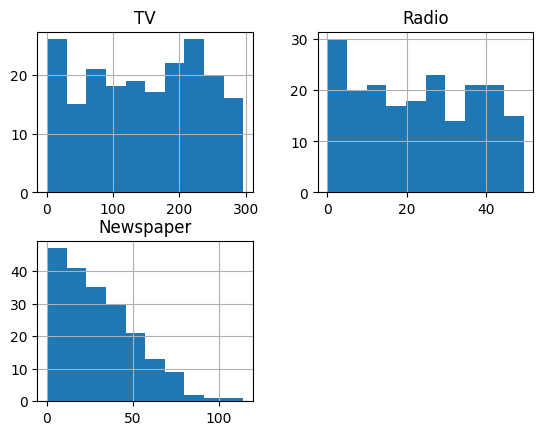

In [43]:
hm.hist()

Plotting Heatmap for the dataset

<Axes: >

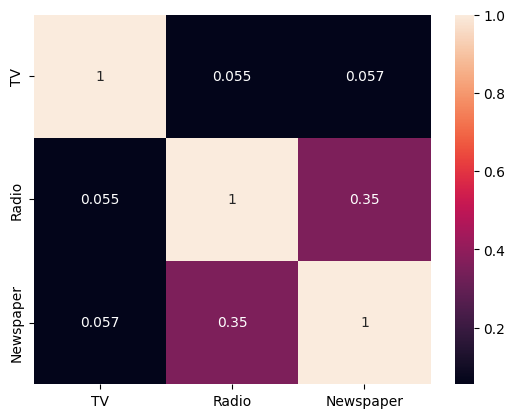

In [44]:
sbn.heatmap(hm.corr(),annot=True)

### Dividing the whole dataset into Independent and Dependent variables

In [45]:
#Independent variables
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [46]:
#Dependent variables
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Dividing both input and output variables into Train and Test datasets

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

Train dataset

In [48]:
x_train

,TV,Radio,Newspaper
114,78.2,46.8,34.5
187,191.1,28.7,18.2
76,27.5,1.6,20.7
122,224.0,2.4,15.6
142,220.5,33.2,37.9
...,...,...,...
132,8.4,27.2,2.1
33,265.6,20.0,0.3
109,255.4,26.9,5.5
139,184.9,43.9,1.7


In [49]:
y_train

114    14.6
187    17.3
76      6.9
122    11.6
142    20.1
       ... 
132     5.7
33     17.4
109    19.8
139    20.7
176    20.2
Name: Sales, Length: 140, dtype: float64

Dimensions of Train dataset

In [50]:
print("Size of x_train is",x_train.shape)
print("Size of y_train is",y_train.shape)

Size of x_train is (140, 3)
Size of y_train is (140,)


Test dataset

In [51]:
x_test

,TV,Radio,Newspaper
112,175.7,15.4,2.4
165,234.5,3.4,84.8
12,23.8,35.1,65.9
73,129.4,5.7,31.3
144,96.2,14.8,38.9
20,218.4,27.7,53.4
199,232.1,8.6,8.7
8,8.6,2.1,1.0
39,228.0,37.7,32.0
88,88.3,25.5,73.4


In [52]:
y_test

112    14.1
165    11.9
12      9.2
73     11.0
144    11.4
20     18.0
199    13.4
8       4.8
39     21.5
88     12.9
81     12.3
197    12.8
69     22.3
160    14.4
25     12.0
99     17.2
151    11.6
23     15.5
138     9.6
159    12.9
89     16.7
82     11.3
24      9.7
174    11.5
137    20.8
83     13.6
107     8.7
34      9.5
97     15.5
167    12.2
123    15.2
157    10.1
75      8.7
152    16.6
117     9.4
149    10.1
63     14.0
54     20.2
125    10.6
80     11.8
170     8.4
183    26.2
38     10.1
153    19.0
40     16.6
190    10.8
177    11.7
131    12.7
13      9.7
121     7.0
1      10.4
116    12.2
100    11.7
166     8.0
168    17.1
48     14.8
178    11.8
108     5.3
61     24.2
16     12.5
Name: Sales, dtype: float64

Dimensions of Test dataset

In [53]:
print("Size of x_test is",x_test.shape)
print("Size of y_test is",y_test.shape)

Size of x_test is (60, 3)
Size of y_test is (60,)


### Training the model with LinearRegression using Train data

In [54]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Giving Test data to the trained model to predict output

In [55]:
y_pred=model.predict(x_test)
print(" Predicted output: ",y_pred)
print("\n Actual output: ",y_test.values)

 Predicted output:  [13.86471261 15.0090562  10.60511722 10.09061905 10.2058302  18.44112845
 15.35623109  3.50456716 20.57163267 11.98288476 15.08601123 12.84835102
 21.13029782 14.37916353 15.96630443 16.97004665 10.28916068 16.78706185
  9.5680503  12.51794578 16.90028224 10.16656637  8.06620555 13.98212973
 21.32738303 14.23529429  7.20839801  7.55987252 15.4385442  13.60561012
 14.89945663 10.22068212 11.980595   16.40933006  6.58023303  9.63142726
 12.99984158 20.51038927  9.15336417 11.31226434  7.30108894 24.61494601
  9.80946097 18.27320104 16.57103149 12.0584219  12.43507395 16.11514576
  8.76566004  7.84595288 12.21810153 12.07628047 14.37606032 10.49776835
 17.58332133 16.68505237 16.43189148  3.56597841 23.2024176  13.2715782 ]

 Actual output:  [14.1 11.9  9.2 11.  11.4 18.  13.4  4.8 21.5 12.9 12.3 12.8 22.3 14.4
 12.  17.2 11.6 15.5  9.6 12.9 16.7 11.3  9.7 11.5 20.8 13.6  8.7  9.5
 15.5 12.2 15.2 10.1  8.7 16.6  9.4 10.1 14.  20.2 10.6 11.8  8.4 26.2
 10.1 19.  16.6 10

In [56]:
r2=r2_score(y_test,y_pred)
print("R-squared score is:",r2)

R-squared score is: 0.8590575550977458


In [57]:
MSE=mean_absolute_error(y_pred,y_test)
MAE=mean_squared_error(y_pred,y_test)
print("Mean Absolute Error is:",MAE)
print("Mean Squared Error is:",MSE)

Mean Absolute Error is: 2.622772900751399
Mean Squared Error is: 1.2349919247199042
